In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
print (os.listdir("C:\\Users\\Deepak Jaiswal\\Desktop\\ICC Test Cricket"))

['ICC Test Bat 3001.xlsx', 'ICC Test Batting Figures.csv', 'icc-test-cricket-runs.zip', '~$ICC Test Bat 3001.xlsx']


In [4]:
data = pd.read_csv("C:\\Users\\Deepak Jaiswal\\Desktop\\ICC Test Cricket\\ICC Test Batting Figures.csv", encoding='ISO-8859-1')

In [5]:
data.head()

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 12 columns):
Player            3001 non-null object
Span              3001 non-null object
Mat               3001 non-null int64
Inn               3001 non-null object
NO                3001 non-null object
Runs              3001 non-null object
HS                3001 non-null object
Avg               3001 non-null object
100               3001 non-null object
50                3001 non-null object
0                 3001 non-null object
Player Profile    3001 non-null object
dtypes: int64(1), object(11)
memory usage: 281.4+ KB


Now empty rows, but all the integer columns are string. so Let's transform them. but before that, the High score has not_out
or not'*', Let's create a new column for not_out or not

In [7]:
def row(player):
    if '*' in player['HS']:
        return 1
    else:
        return 0
    
data['hs_not_out'] = data.apply(row, axis=1)

In [9]:
data.head(15)

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile,hs_not_out
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...,1
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...,0
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...,0
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...,0
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...,0
5,KC Sangakkara (SL),2000-2015,134,233,17,12400,319,57.4,38,52,11,http://stats.espncricinfo.com/ci/content/playe...,0
6,BC Lara (ICC/WI),1990-2006,131,232,6,11953,400*,52.88,34,48,17,http://stats.espncricinfo.com/ci/content/playe...,1
7,S Chanderpaul (WI),1994-2015,164,280,49,11867,203*,51.37,30,66,15,http://stats.espncricinfo.com/ci/content/playe...,1
8,DPMD Jayawardene (SL),1997-2014,149,252,15,11814,374,49.84,34,50,15,http://stats.espncricinfo.com/ci/content/playe...,0
9,AR Border (AUS),1978-1994,156,265,44,11174,205,50.56,27,63,11,http://stats.espncricinfo.com/ci/content/playe...,0


some players have empty integer columns, so let's remove them

In [11]:
data['HS'] = data['HS'].str.replace('*', '')
data['HS'] = data['HS'].str.replace('-', '0')
data['Mat'] = data['Mat'].replace('-', '0')
data['Inn'] = data['Inn'].str.replace('-', '0')
data['NO'] = data['NO'].str.replace('-', '0')
data['Runs'] = data['Runs'].str.replace('-', '0')
data['100'] = data['100'].str.replace('-', '0')
data['50'] = data['50'].str.replace('-', '0')
data['0'] = data['0'].str.replace('-', '0')
data['Avg'] = data['Avg'].str.replace('-', '0')


Convert all string columns to integer

In [12]:
data['Inn'] = data['Inn'].astype('int32')
data['NO'] = data['NO'].astype('int32')
data['Runs'] = data['Runs'].astype('int32')
data['HS'] = data['HS'].astype('int32')
data['Avg'] = data['Avg'].astype('float32')
data['100'] = data['100'].astype('int32')
data['50'] = data['50'].astype('int32')
data['0'] = data['0'].astype('int32')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 13 columns):
Player            3001 non-null object
Span              3001 non-null object
Mat               3001 non-null int64
Inn               3001 non-null int32
NO                3001 non-null int32
Runs              3001 non-null int32
HS                3001 non-null int32
Avg               3001 non-null float32
100               3001 non-null int32
50                3001 non-null int32
0                 3001 non-null int32
Player Profile    3001 non-null object
hs_not_out        3001 non-null int64
dtypes: float32(1), int32(7), int64(2), object(3)
memory usage: 211.1+ KB


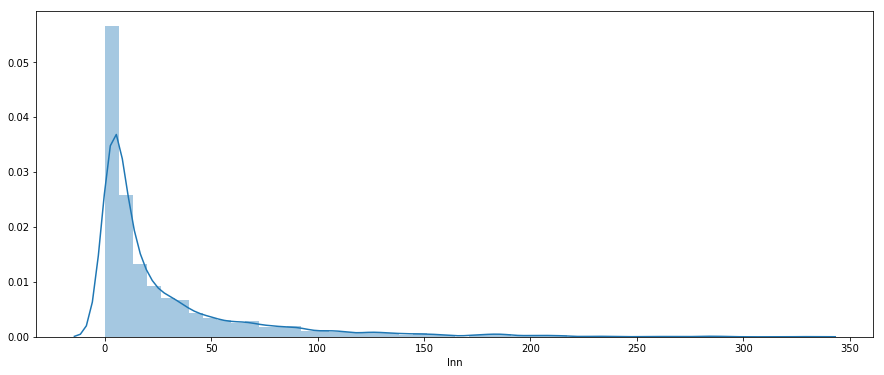

In [15]:
# Histogram for the avg.innings played
plt.figure(figsize=(15,6))
sns.distplot(data['Inn'])

Text(0.5, 1.0, 'Np. of innings played vs centuries scored')

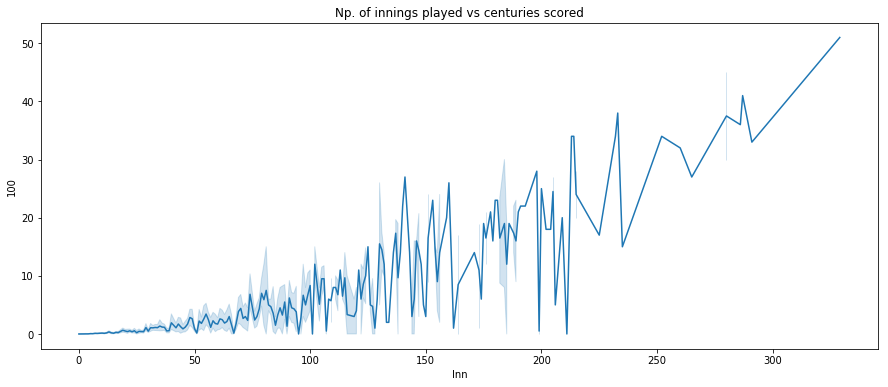

In [16]:
plt.figure(figsize=(15,6))
sns.lineplot(data['Inn'], data['100'])
plt.title('Np. of innings played vs centuries scored')

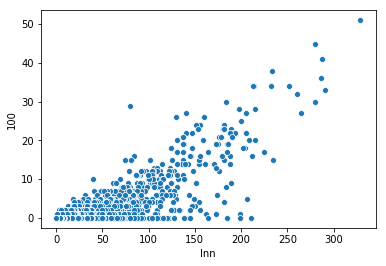

In [18]:
# Scatterplot for the no of centuries scored for the innings played
sns.scatterplot(data['Inn'], data['100'])

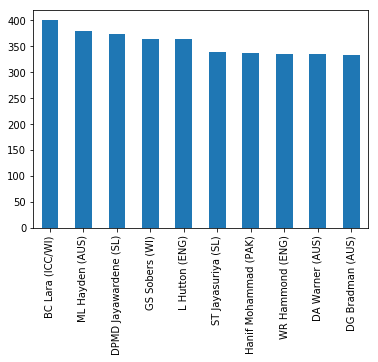

In [20]:
# high score from a player
top_10_HS = data['HS'].sort_values(ascending=False)[:10].index
top_10 = data.iloc[top_10_HS]
top_10['HS'].plot.bar()
y = np.arange(10)
plt.xticks(y, labels=top_10['Player'])
plt.show()

Text(0.5, 1.0, 'High score vs no. of innings played')

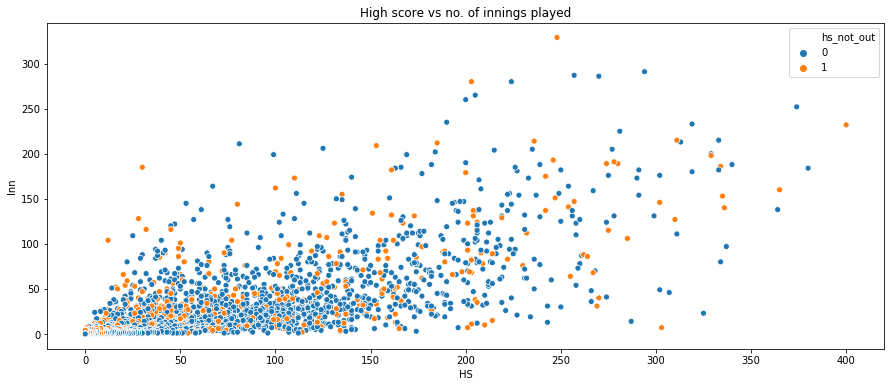

In [21]:
plt.figure(figsize=(15,6))
sns.scatterplot(data['HS'], data['Inn'], hue=data['hs_not_out'])
plt.title('High score vs no. of innings played')

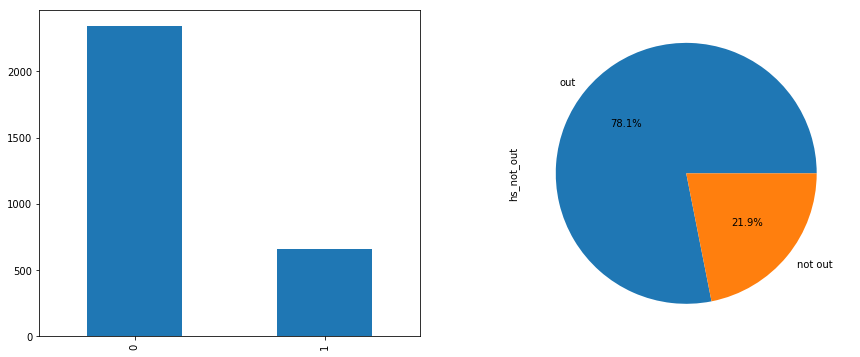

In [22]:
#distribution of whether batsman was out or not out when they scored the ir high score
f, ax = plt.subplots(1,2,figsize=(15,6))
data['hs_not_out'].value_counts().plot.bar(ax=ax[0])
labels = ['out','not out']
data['hs_not_out'].value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%',
                                          labels=labels)

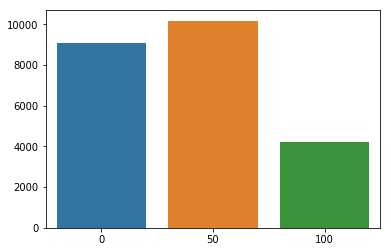

In [23]:
#no of 100,50,0 runs scored
x = [100,50,0]
y = [data['100'].sum(), data['50'].sum(), data['0'].sum()]
sns.barplot(x,y)

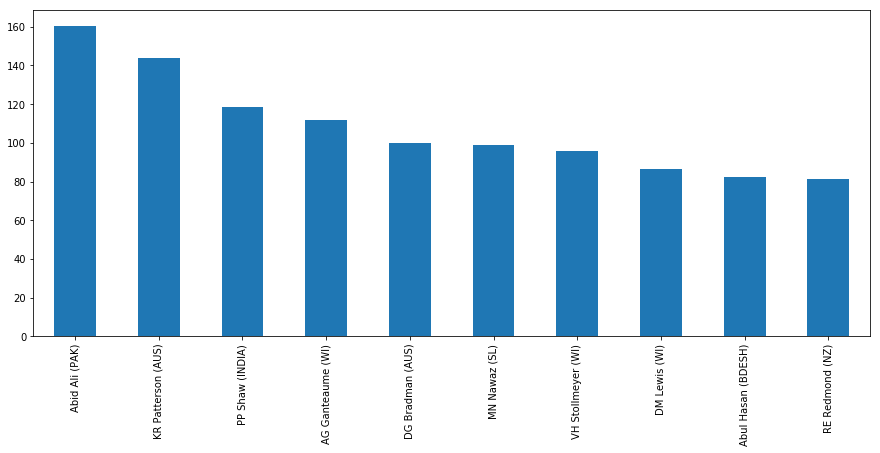

In [24]:
# top 10 avg runs by a player 
plt.figure(figsize=(15,6))
top_10_avg = data['Avg'].sort_values(ascending=False)[:10].index
top_10 = data.iloc[top_10_avg]
top_10['Avg'].plot.bar()
y = np.arange(10)
plt.xticks(y, labels=top_10['Player'])
plt.show()

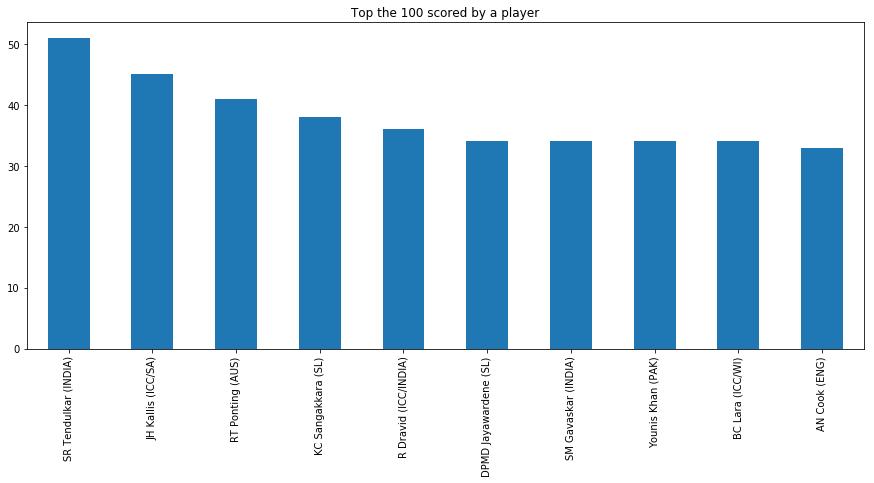

In [26]:
# most 100's by a player
plt.figure(figsize=(15,6))
top_100_i = data['100'].sort_values(ascending=False)[:10].index
top_100 = data.iloc[top_100_i]
top_100
top_100['100'].plot.bar()
y = np.arange(10)
plt.xticks(y, top_100['Player'])
plt.title('Top the 100 scored by a player')
plt.show()